In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random as rand

In [11]:
archivo = '/Users/blackdeadpool/Desktop/lesmis.sif'

In [12]:
def leer_sif(arch):
    G = nx.Graph()
    datos = open(arch, 'r')
    for line in datos:
        data = line.split()
        G.add_edge(data[0],data[2])
    return G    

In [13]:
G = leer_sif(archivo)
#G = nx.karate_club_graph()
A = nx.to_numpy_matrix(G)
e = nx.eigenvector_centrality(G)
d = nx.degree_centrality(G)
c = nx.closeness_centrality(G)
b = nx.betweenness_centrality(G)

In [14]:
s_h = {k: v for k, v in sorted(e.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break        

In [15]:
import pandas as pd
aux1=[]
for k in new_SH.keys():
    aux1.append(k) 
d1 = {'Eigenvector' : aux1}

In [16]:
s_h = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [17]:
import pandas as pd
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
index = [1,2,3,4,5,6,7,8,9,10]  
d2 = {'Degree' : aux1}

In [18]:
s_h = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [19]:
import pandas as pd
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d3 = {'Closeness' : aux1}

In [20]:
s_h = {k: v for k, v in sorted(b.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [21]:
import pandas as pd
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d4 = {'Betweenness' : aux1}

In [22]:
def transition(i,j,G,A):
    LDN=list(G.nodes())
    return A[LDN.index(i),LDN.index(j)]/G.degree(i)

In [23]:
def step(i,G,A):
    N=[vecino for vecino in nx.neighbors(G,i)]
    coeficiente_part=[]
    for v in N:
        coeficiente_part.append(transition(i,v,G,A))
    part=[]
    aux=0
    for coef in coeficiente_part:
        part.append(aux+coef)
        aux=aux+coef
    r=np.random.random()
    for p in range(len(part)):
        if p==0:
            if r<part[p]:
                indexf=0
                break
        if p>0:
            if p==len(part)-1:
                indexf=p
                break
            elif (part[p-1]<r  and r<part[p])==True: 
                indexf=p
                break
    return N[indexf]

In [24]:
list_nodes = list(G.nodes())

In [25]:
ic=rand.choice(list_nodes) #initial condition
Orbit=[ic]
for i in range(10000):
    ic=step(ic,G,A)
    Orbit.append(ic)

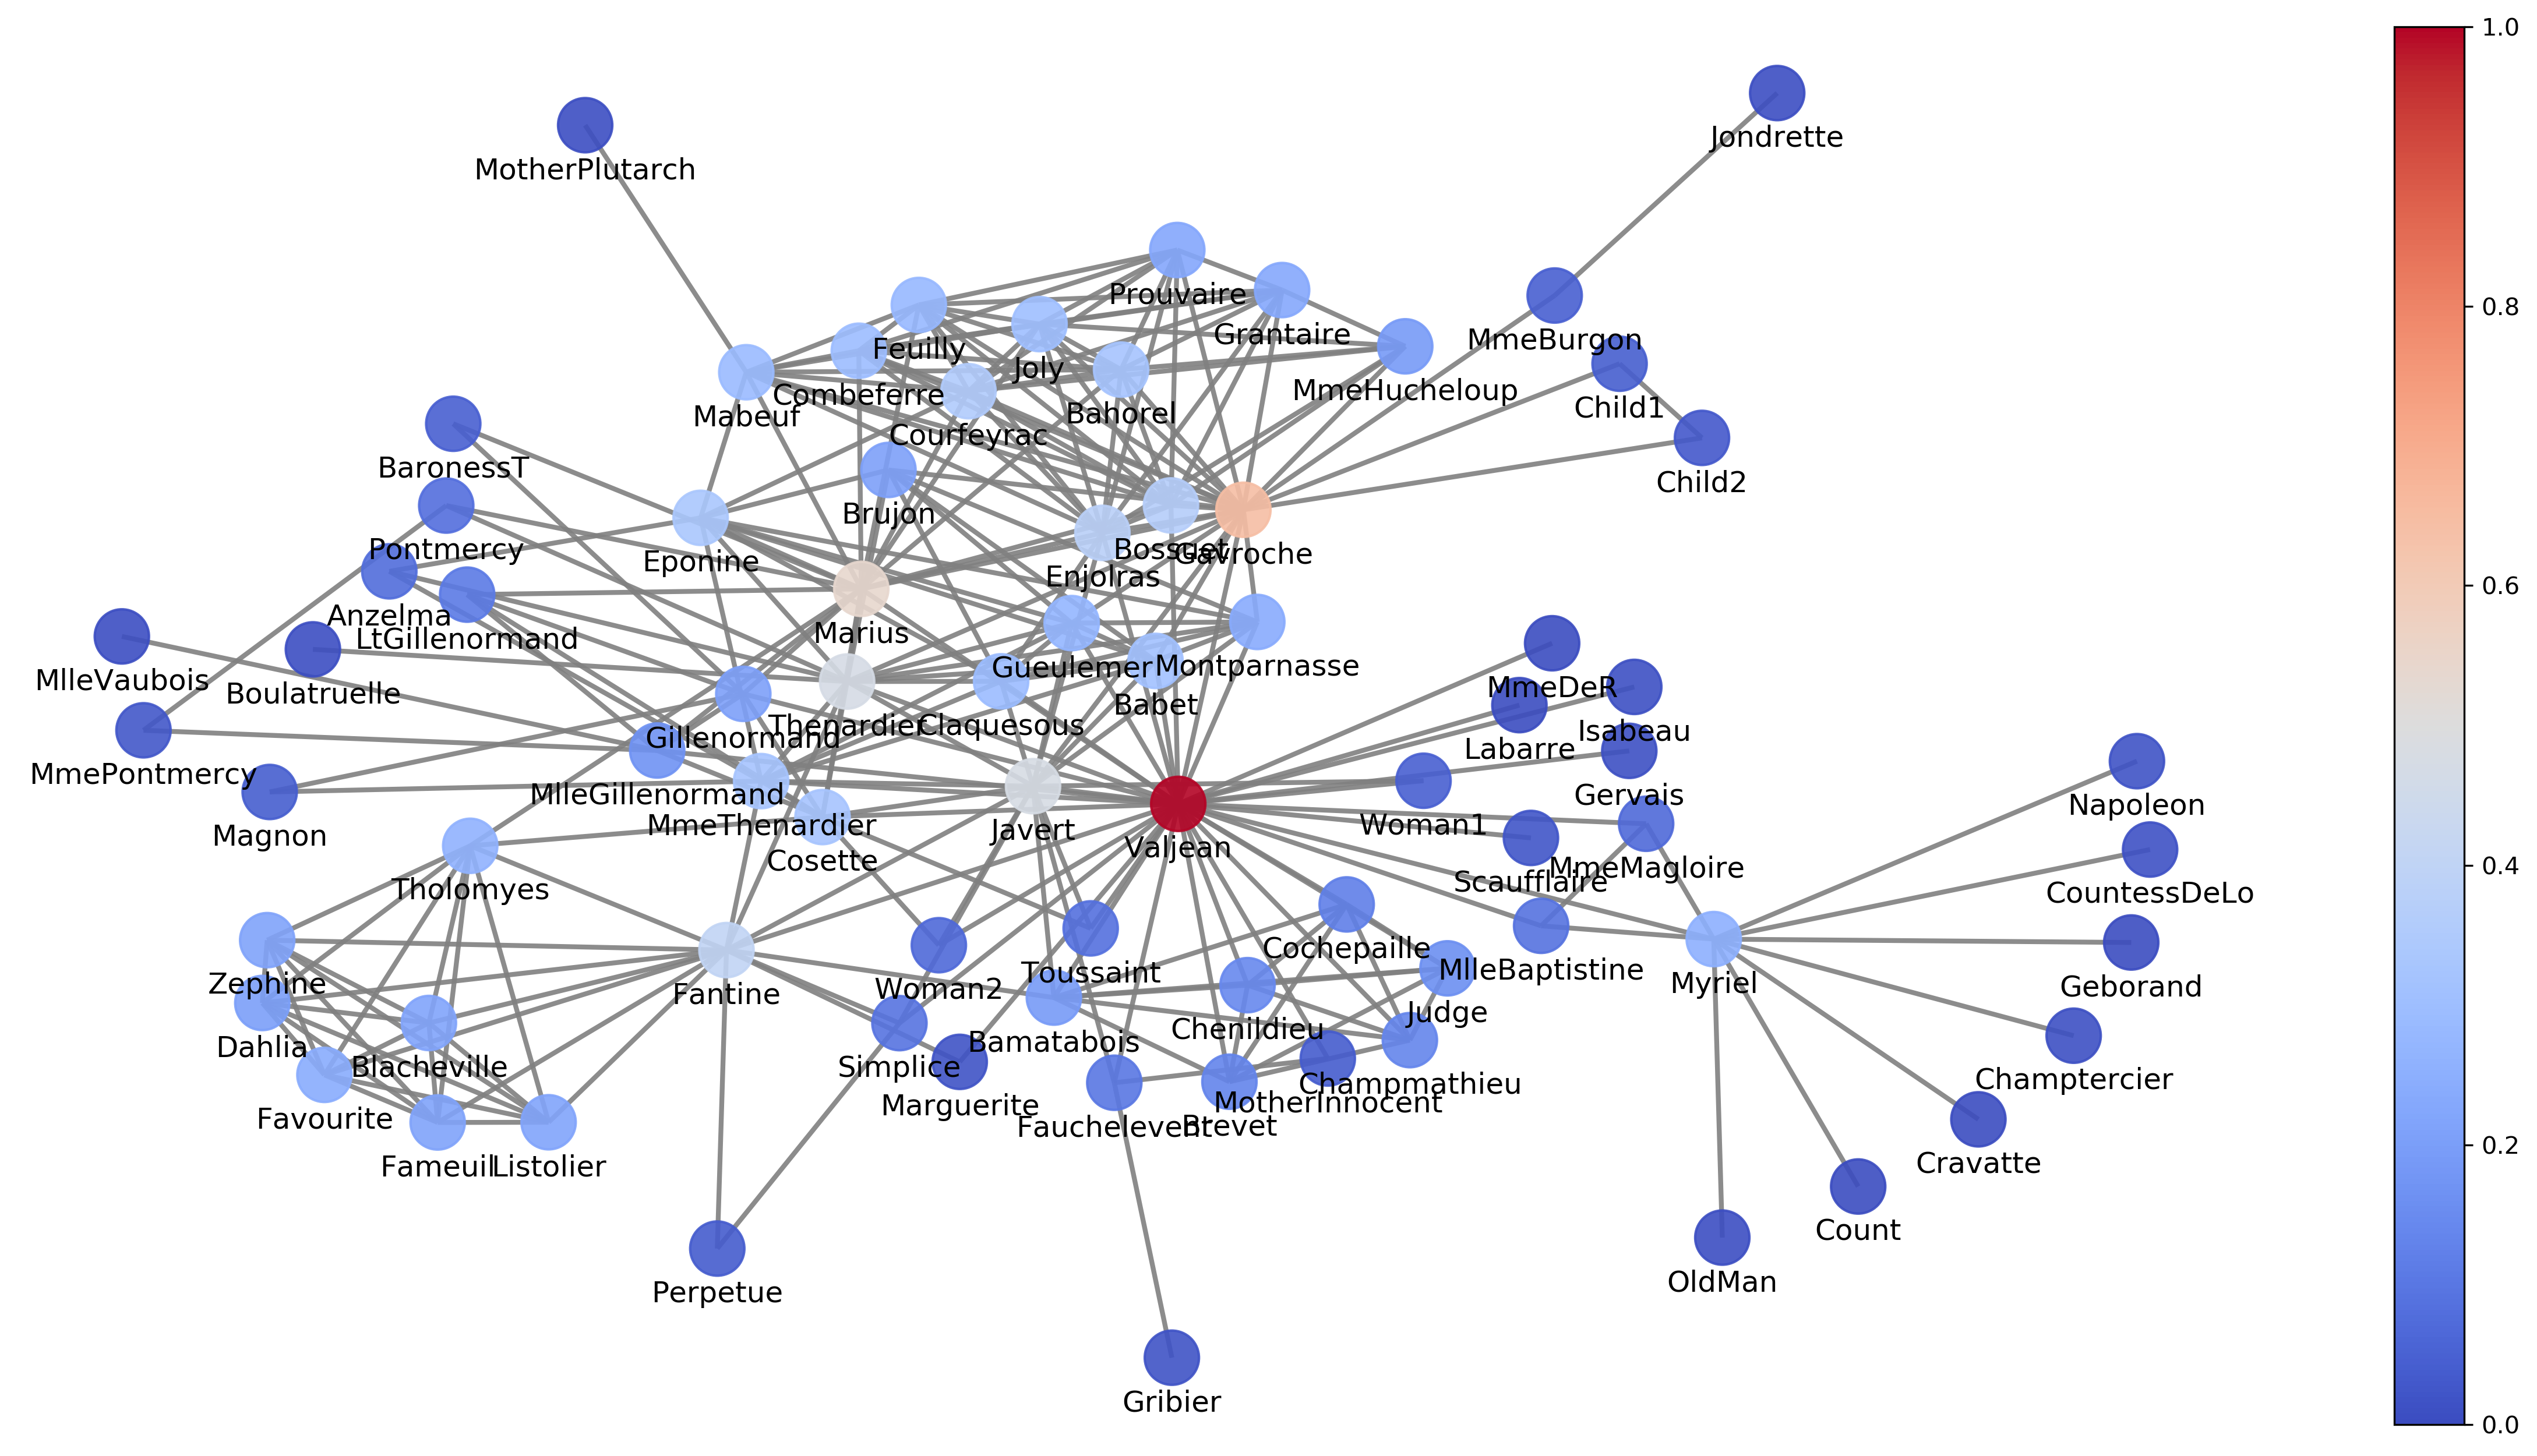

In [40]:
import pylab as plt
node_color=[float(Orbit.count(i)) for i in G]
cmap = plt.cm.coolwarm
#cmap = plt.cm.plasma
#cmap = plt.cm.seismic
#cmap = plt.cm.Spectral_r
#cmap = plt.cm.jet

plt.figure(figsize=(16,8), dpi=300)
#plt.figure()
#pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)
#pos = nx.shell_layout(G)
#pos = nx.spectral_layout(G)

nx.draw(G, pos, node_color=node_color, node_size=500, edge_color='gray',
        width=2, with_labels=False, cmap=cmap,alpha=0.9)
for p in pos:
    pos[p][1] -= 0.07
nx.draw_networkx_labels(G, pos) 
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize())
sm._A = []
plt.colorbar(sm)
plt.show()

In [29]:
hist_order = dict(zip(list(G.nodes()),node_color))

In [30]:
sorted_hist = {k: v for k, v in sorted(hist_order.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in sorted_hist.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [31]:
import pandas as pd
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
index = [1,2,3,4,5,6,7,8,9,10]  
d5 = {'Newman' : aux1}
data_Dic = dict(list(d1.items())+list(d2.items())+list(d3.items())+list(d4.items())+list(d5.items()))

In [32]:
dframe = pd.DataFrame(data_Dic,index=index)
dframe.head(70)

,Eigenvector,Degree,Closeness,Betweenness,Newman
1,Gavroche,Valjean,Valjean,Valjean,Valjean
2,Valjean,Gavroche,Marius,Myriel,Gavroche
3,Enjolras,Marius,Thenardier,Gavroche,Marius
4,Marius,Javert,Javert,Marius,Javert
5,Bossuet,Thenardier,Gavroche,Fantine,Thenardier
6,Courfeyrac,Enjolras,Enjolras,Thenardier,Fantine
7,Bahorel,Fantine,Cosette,Javert,Enjolras
8,Joly,Courfeyrac,Bossuet,MlleGillenormand,Bossuet
9,Feuilly,Bossuet,Gueulemer,Enjolras,Courfeyrac
10,Combeferre,Bahorel,Babet,Tholomyes,Eponine


In [33]:
H = []
for w in sorted(new_SH, key=new_SH.get, reverse=True):
  H.append(new_SH[w])
H = np.array(H)
H = H/max(H)

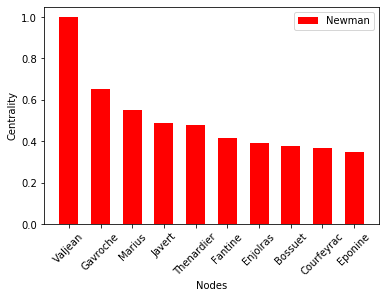

In [41]:
pos = np.arange(len(new_SH))
plt.bar(range(len(H)),H, align='center',color= 'r', width=0.6)
plt.xticks(pos, new_SH.keys(),rotation = 45)
plt.ylabel('Centrality')
plt.xlabel('Nodes')
plt.legend(['Newman'])
plt.show()